In [1]:
import json
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import json
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

# MLP grad norms

In [2]:

with open('/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_8/gradient_norms_MLP.json', 'r') as file:
    mlp_gradnorms = json.load(file)

with open('/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_8/gradient_norms_ResNet18.json', 'r') as file:
    ResNet_gradnorms = json.load(file)

with open('/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_8/gradient_norms_MLPMixer.json', 'r') as file:
    Mixer_gradnorms = json.load(file)

In [3]:
for key in mlp_gradnorms:
    print(key)

hidden_layers.0.weight
hidden_layers.0.bias
hidden_layers.1.weight
hidden_layers.1.bias
hidden_layers.2.weight
hidden_layers.2.bias
hidden_layers.3.weight
hidden_layers.3.bias
output_layer.weight
output_layer.bias


In [32]:
len(mlp_gradnorms['hidden_layers.1.weight'])

20

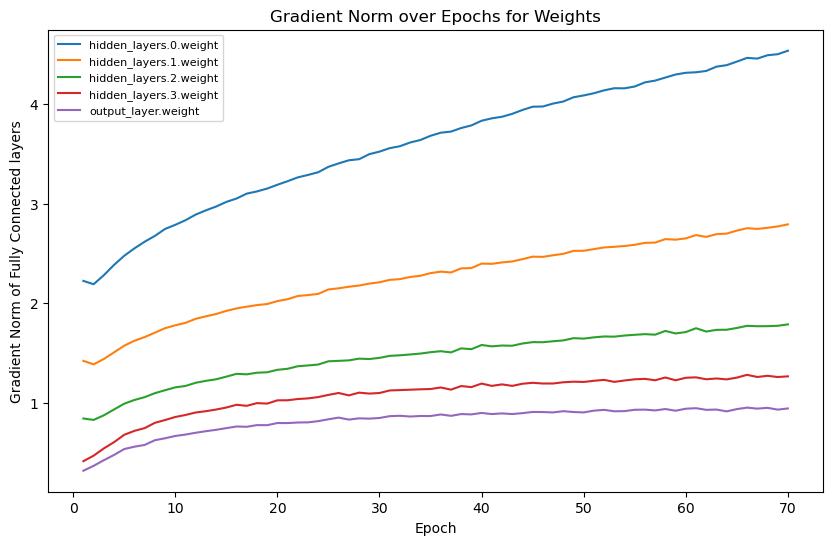

In [6]:
import matplotlib.pyplot as plt

# Separate keys into weight and bias groups
weight_keys = [key for key in mlp_gradnorms if key.endswith('.weight')]
bias_keys   = [key for key in mlp_gradnorms if key.endswith('.bias')]

# Plot gradient norms for weight parameters
plt.figure(figsize=(10, 6))
for key in weight_keys:
    epochs = range(1, len(mlp_gradnorms[key]) + 1)
    plt.plot(epochs, mlp_gradnorms[key], label=key)
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm of Fully Connected layers")
plt.title("Gradient Norm over Epochs for Weights")
plt.legend(loc='best', fontsize=8)
plt.savefig('/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_8/MLP_70_norms')

# ResNet18

In [ ]:
for key in ResNet_gradnorms:
    print(key)

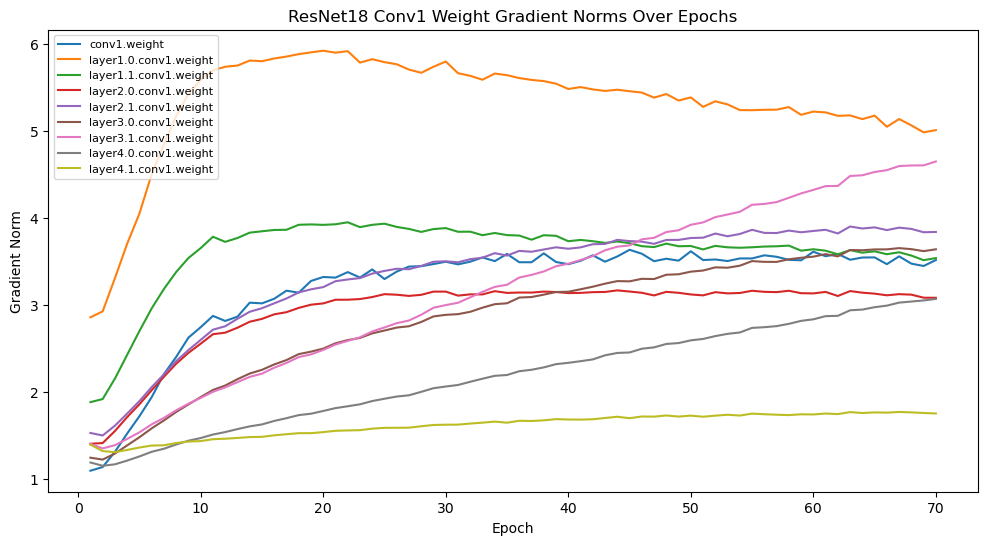

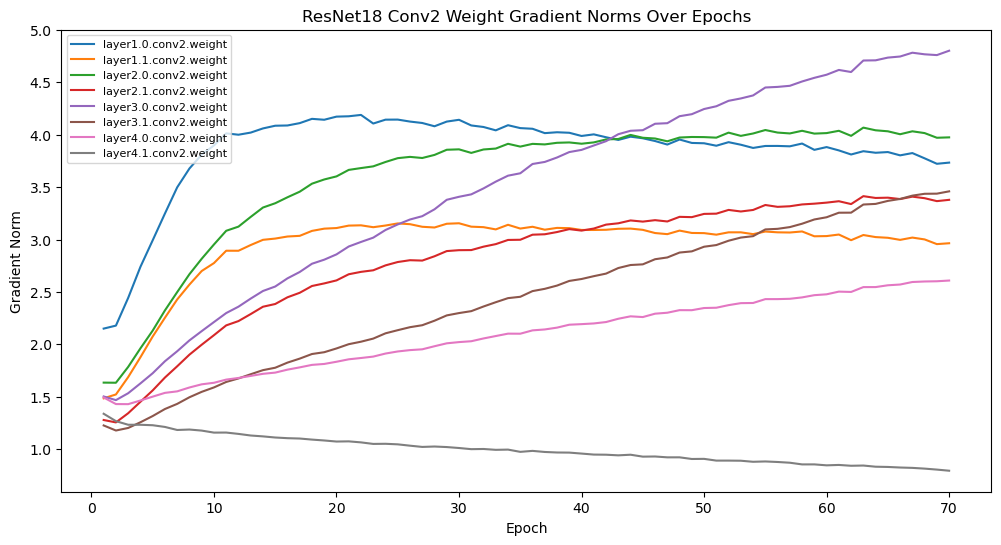

In [8]:
import matplotlib.pyplot as plt

# Filter keys for conv1 and conv2 weights
conv1_keys = [key for key in ResNet_gradnorms if 'conv1.weight' in key]
conv2_keys = [key for key in ResNet_gradnorms if 'conv2.weight' in key]

# Plot for conv1 weights
plt.figure(figsize=(12, 6))
for key in conv1_keys:
    epochs = range(1, len(ResNet_gradnorms[key]) + 1)
    plt.plot(epochs, ResNet_gradnorms[key], label=key)
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("ResNet18 Conv1 Weight Gradient Norms Over Epochs")
plt.legend(fontsize=8)
plt.savefig('/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_8/ResNet18_norms_70__conv1')

# Plot for conv2 weights
plt.figure(figsize=(12, 6))
for key in conv2_keys:
    epochs = range(1, len(ResNet_gradnorms[key]) + 1)
    plt.plot(epochs, ResNet_gradnorms[key], label=key)
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("ResNet18 Conv2 Weight Gradient Norms Over Epochs")
plt.legend(fontsize=8)
plt.savefig('/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_8/ResNet18_norms_70_conv2')


# MLPMixer

In [ ]:
for key in Mixer_gradnorms:
    print(key)

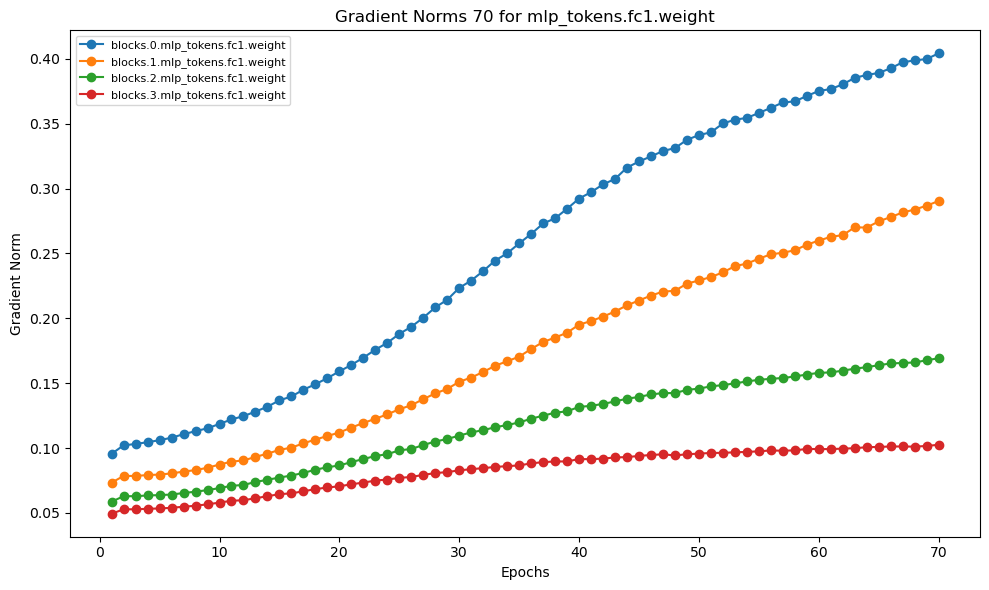

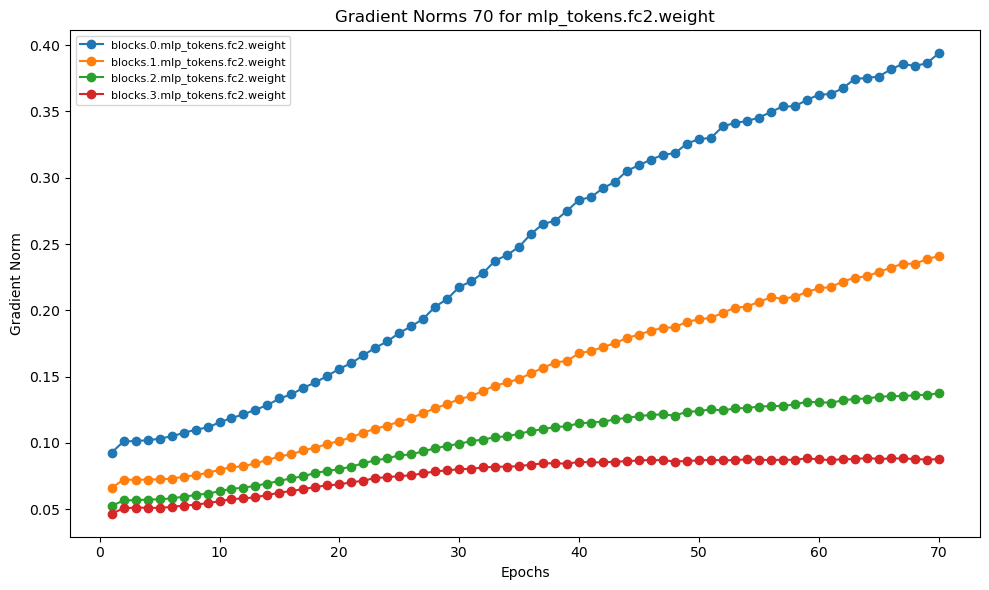

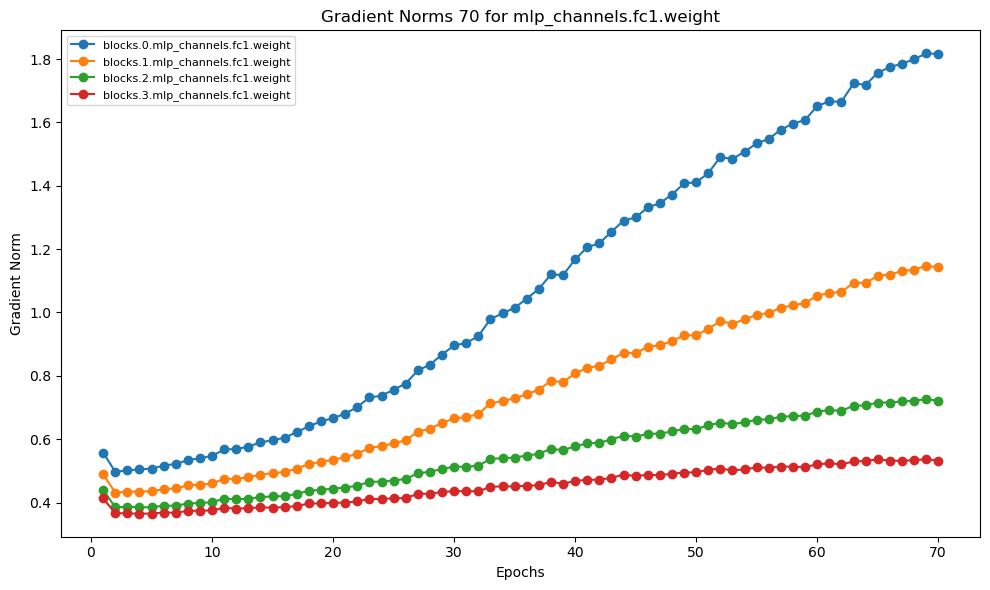

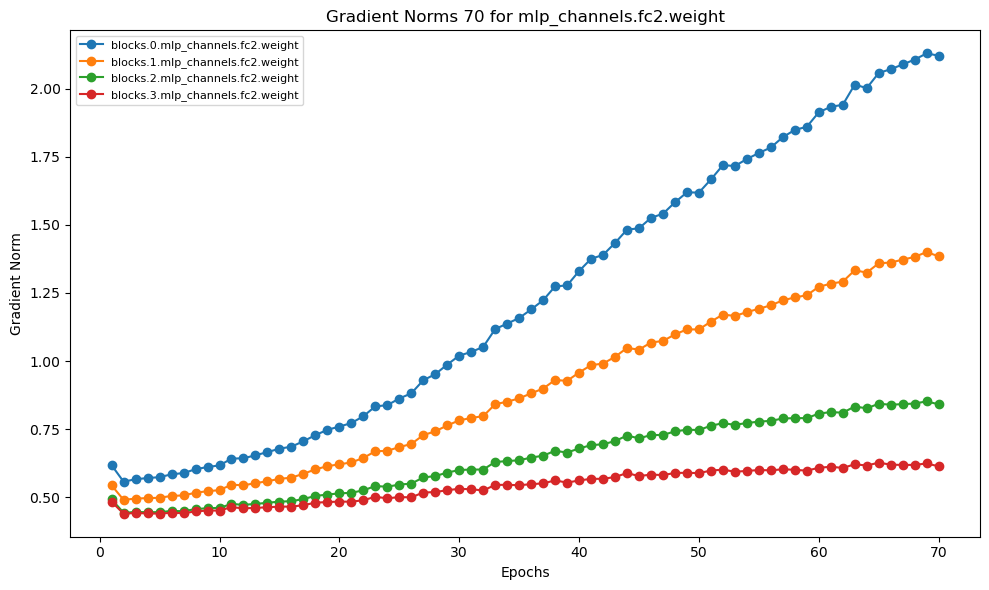

In [9]:
import matplotlib.pyplot as plt

# Filter the keys for each of the four parameter groups:
keys_token_fc1 = [key for key in Mixer_gradnorms if 'mlp_tokens.fc1.weight' in key]
keys_token_fc2 = [key for key in Mixer_gradnorms if 'mlp_tokens.fc2.weight' in key]
keys_channel_fc1 = [key for key in Mixer_gradnorms if 'mlp_channels.fc1.weight' in key]
keys_channel_fc2 = [key for key in Mixer_gradnorms if 'mlp_channels.fc2.weight' in key]

def plot_gradients(keys, title):
    plt.figure(figsize=(10, 6))
    for key in keys:
        epochs = range(1, len(Mixer_gradnorms[key]) + 1)
        plt.plot(epochs, Mixer_gradnorms[key], marker='o', label=key)
    plt.xlabel("Epochs")
    plt.ylabel("Gradient Norm")
    plt.title(title)
    plt.legend(fontsize=8)
    plt.tight_layout()
    #plt.show()
    plt.savefig(f'/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_8/{title}.png')


# Plot for each parameter group
plot_gradients(keys_token_fc1, "Gradient Norms 70 for mlp_tokens.fc1.weight")
plot_gradients(keys_token_fc2, "Gradient Norms 70 for mlp_tokens.fc2.weight")
plot_gradients(keys_channel_fc1, "Gradient Norms 70 for mlp_channels.fc1.weight")
plot_gradients(keys_channel_fc2, "Gradient Norms 70 for mlp_channels.fc2.weight")
